In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from keras import optimizers
from keras.utils import plot_model
from keras.models import Sequential, Model
from keras.layers import Conv2D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

## Data Loading and Visualization

In [2]:
# Read salary data
file_path = Path("Resources/global-data-on-sustainable-energy (1).csv")
df_energy = pd.read_csv(file_path)

# Display sample data
df_energy.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,"6,52,230",33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,"6,52,230",33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,"6,52,230",33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,"6,52,230",33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,"6,52,230",33.93911,67.709953


In [3]:
from sklearn.linear_model import LinearRegression

In [25]:
df_renewable_china = df_energy[df_energy["Entity"] == 'China']
df_renewable_china.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
714,China,2000,97.021800,42.0,58.78,243620000.0,29.63,1113.30,16.74,225.56,...,9334.936,10.85,3346530.000,5.656925,8.490093,959.372484,153,"95,96,960",35.86166,104.195397
715,China,2001,97.272790,42.3,61.01,325050000.0,28.36,1182.59,17.47,280.73,...,9797.812,10.36,3529080.000,6.618624,8.335733,1053.108243,153,"95,96,960",35.86166,104.195397
716,China,2002,97.516205,43.1,63.68,218270000.0,27.00,1337.46,25.13,291.41,...,10602.087,10.12,3810060.059,6.280488,9.133631,1148.508290,153,"95,96,960",35.86166,104.195397
717,China,2003,97.754380,43.4,70.24,22510000.0,23.86,1579.96,43.34,287.28,...,12273.320,10.48,4415910.156,5.301109,10.038030,1288.643252,153,"95,96,960",35.86166,104.195397
718,China,2004,97.989670,44.9,77.85,32680000.0,20.17,1795.41,50.47,357.43,...,14272.745,10.83,5124819.824,5.600940,10.113621,1508.668098,153,"95,96,960",35.86166,104.195397


In [26]:
columns_to_clean = ["Electricity from renewables (TWh)"]
df_renewable_china_cleaned = df_renewable_china.dropna(subset=columns_to_clean)

df_renewable_china_cleaned ['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
      dtype=int64)

In [27]:
# Feature engineering (adding lag features)
df_renewable_china_cleaned['renewable_lag_1'] = df_renewable_china_cleaned['Electricity from renewables (TWh)'].shift(1)


In [28]:
df_renewable_china_cleaned = df_renewable_china_cleaned[1:]

In [29]:
# Split data into training and testing sets
train_data, test_data = train_test_split(df_renewable_china_cleaned, test_size=0.2, shuffle=False)


In [30]:

# Create feature matrix and target variable
X_train = train_data[['Year', 'renewable_lag_1']].values
X_train

array([[2001.  ,  225.56],
       [2002.  ,  280.73],
       [2003.  ,  291.41],
       [2004.  ,  287.28],
       [2005.  ,  357.43],
       [2006.  ,  404.37],
       [2007.  ,  446.72],
       [2008.  ,  500.71],
       [2009.  ,  665.08],
       [2010.  ,  664.39],
       [2011.  ,  786.38],
       [2012.  ,  792.38],
       [2013.  ,  999.56],
       [2014.  , 1093.37],
       [2015.  , 1289.23],
       [2016.  , 1393.66]])

In [44]:
y_train = train_data['Electricity from renewables (TWh)'].values


In [45]:
X_test = test_data[['Year', 'renewable_lag_1']].values
X_test

array([[2017.  , 1522.79],
       [2018.  , 1667.06],
       [2019.  , 1835.32],
       [2020.  , 2014.57]])

In [46]:
y_test = test_data['Electricity from renewables (TWh)'].values


In [47]:

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Root Mean Squared Error: 50.60364847242665


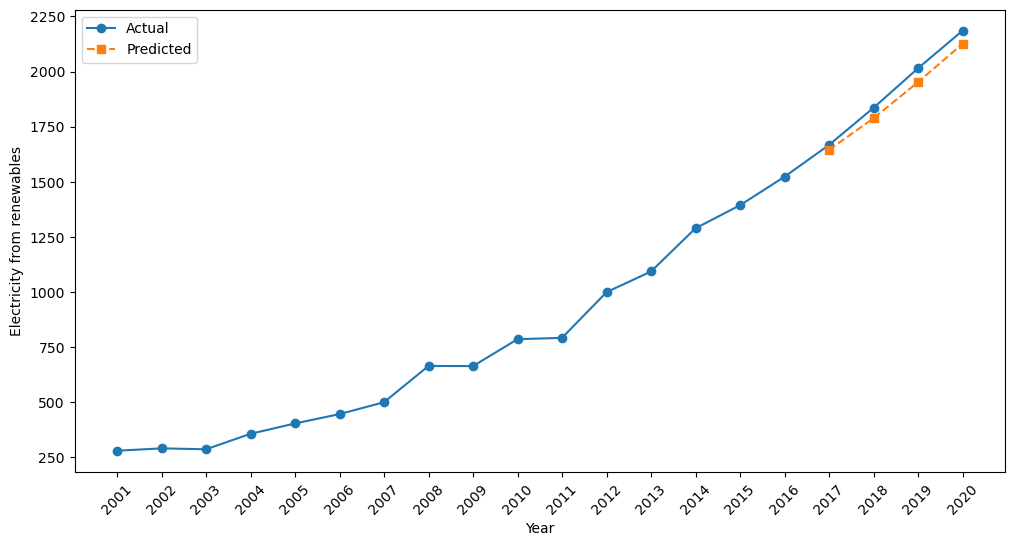

In [40]:

# Make predictions
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")

# Visualization
x_values = df_renewable_china_cleaned['Year']

plt.figure(figsize=(12, 6))
plt.plot(df_renewable_china_cleaned['Year'], df_renewable_china_cleaned['Electricity from renewables (TWh)'], label='Actual', marker='o')
plt.plot(test_data['Year'], y_pred, label='Predicted', linestyle='dashed', marker='s')
plt.xlabel('Year')
plt.ylabel('Electricity from renewables')
plt.legend()
plt.xticks(x_values, rotation=45) # Rotate the labels for better visibility
plt.show()

In [41]:
# Import relevant metrics - score, r2, mse, rmse, std - from Scikit-learn
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
# Compute the metrics for the linear regression model
score = model.score(X_train, y_train, sample_weight=None)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
std = np.std(y_test)

# Print relevant metrics.
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

The score is 0.9834136398885369.
The r2 is 0.9317894830803968.
The mean squared error is 2560.7292387209277.
The root mean squared error is 50.60364847242665.
The standard deviation is 193.7564460056749.


In [49]:
# Compute the metrics for the linear regression model
score = model.score(X_test, y_test, sample_weight=None)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
std = np.std(y_test)

# Print relevant metrics.
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

The score is 0.9317894830803968.
The r2 is 0.9317894830803968.
The mean squared error is 2560.7292387209277.
The root mean squared error is 50.60364847242665.
The standard deviation is 193.7564460056749.
